In [31]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings

### The Data

The dataset for this project is sourced from Monitoring the Future: A Continuing Study of American Youth (https://www.icpsr.umich.edu/web/ICPSR/studies/38882).

This ongoing survey examines shifts in key values, behaviors, and lifestyle choices among American youth. It focuses on 12th-grade students, who are randomly assigned one of six questionnaires. Each questionnaire covers a unique subset of topics while including a core set of questions on demographics and drug use.

In [21]:
Core_df = pd.read_csv("ICPSR_38882/DS0001/38882-0001-Data.tsv", sep='\t')
DS2 = pd.read_csv("ICPSR_38882/DS0002/38882-0002-Data.tsv", sep='\t')
DS3 = pd.read_csv("ICPSR_38882/DS0003/38882-0003-Data.tsv", sep='\t')
DS4 = pd.read_csv("ICPSR_38882/DS0004/38882-0004-Data.tsv", sep='\t')
DS6 = pd.read_csv("ICPSR_38882/DS0006/38882-0006-Data.tsv", sep='\t')

In [3]:
#Total number of variables
def count_unique_variables(dfs):
    unique_columns = []

    for dataframe in dfs:
        for column in dataframe.columns:
            if column not in unique_columns:
                unique_columns.append(column)
            
    return len(unique_columns)

dataframes = [Core_df, DS2, DS3, DS4, DS6]
print("Total number of unique variables:", count_unique_variables(dataframes))

Total number of unique variables: 1672


In [4]:
political_party_belief = ['V2167'] 
gpa_column = ['V2179']
nicotine_addiction_belief = ['V7931']

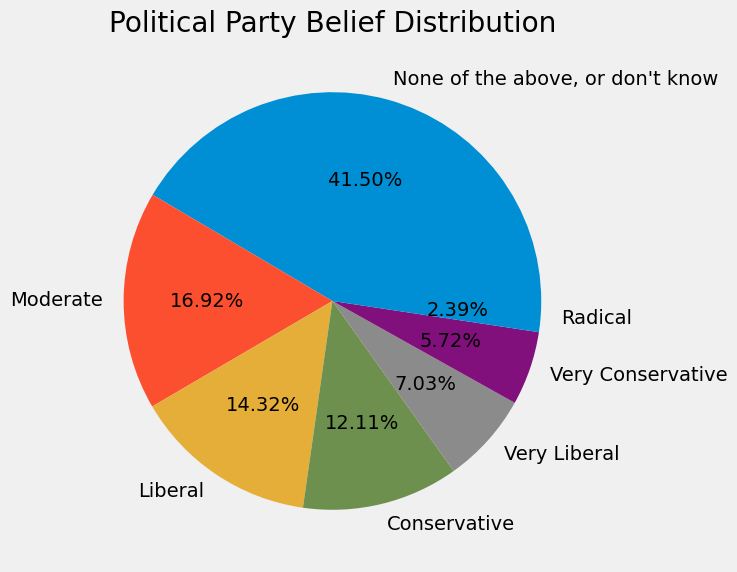

In [5]:
#Political Party Belief pie chart
political_beliefs_mapping = {
    1: "Very Conservative",
    2: "Conservative",
    3: "Moderate",
    4: "Liberal",
    5: "Very Liberal",
    6: "Radical",
    8: "None of the above, or don't know"
}

Core_df['PoliticalBeliefs'] = Core_df['V2167'].map(political_beliefs_mapping)

political_belief_counts = Core_df['PoliticalBeliefs'].value_counts()

plt.figure(figsize=(6, 8)) 
plt.pie(political_belief_counts, labels=political_belief_counts.index, autopct='%.2f%%')
plt.title('Political Party Belief Distribution')  

plt.show()

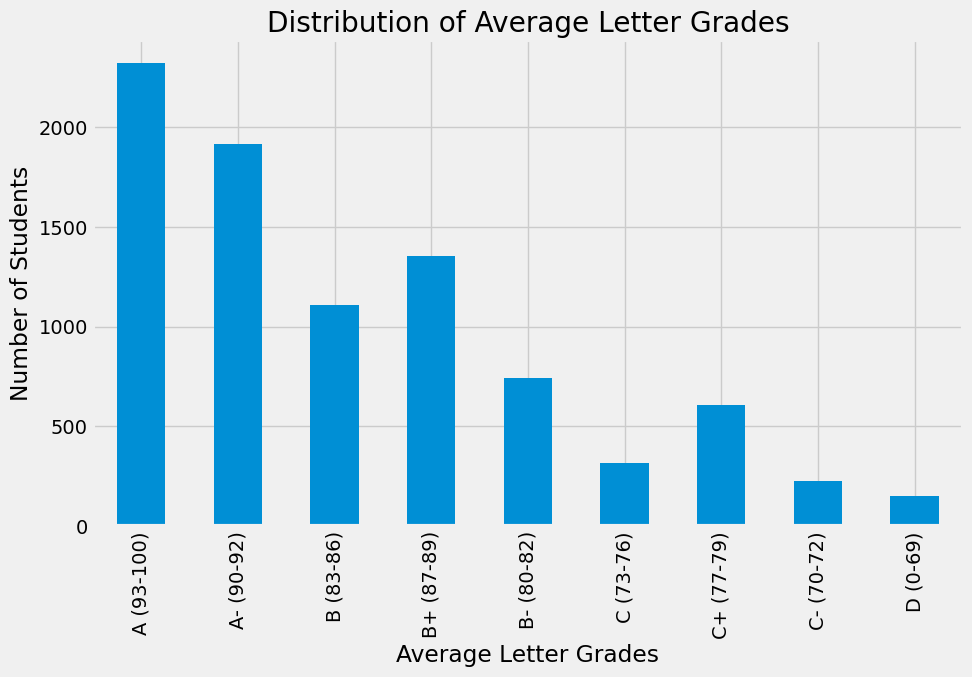

In [59]:
grades_mapping = {
    9: "A (93-100)",
    8: "A- (90-92)",
    7: "B+ (87-89)",
    6: "B (83-86)",
    5: "B- (80-82)",
    4: "C+ (77-79)",
    3: "C (73-76)",
    2: "C- (70-72)",
    1: "D (0-69)"
}

Core_df['AverageGrade'] = Core_df['V2179'].map(grades_mapping)

plt.figure(figsize=(10, 6))
Core_df['AverageGrade'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Average Letter Grades')
plt.xlabel('Average Letter Grades')
plt.ylabel('Number of Students')
plt.show()

In [7]:
nicotine_addiction_mapping = {
    8: "I don't know",
    1: "Not at all addictive",
    2: "A little addictive",
    3: "Somewhat addictive",
    4: "Very addictive"
}

Core_df['NicotineAddictionBelief'] = Core_df['V7931'].map(nicotine_addiction_mapping)

nicotine_addiction_distribution = Core_df['NicotineAddictionBelief'].value_counts().reset_index()
nicotine_addiction_distribution.columns = ['Belief about Nicotine Addiction', 'Number of Students']

nicotine_addiction_distribution

,Belief about Nicotine Addiction,Number of Students
0,Very addictive,1324
1,I don't know,785
2,Somewhat addictive,404
3,A little addictive,247
4,Not at all addictive,236


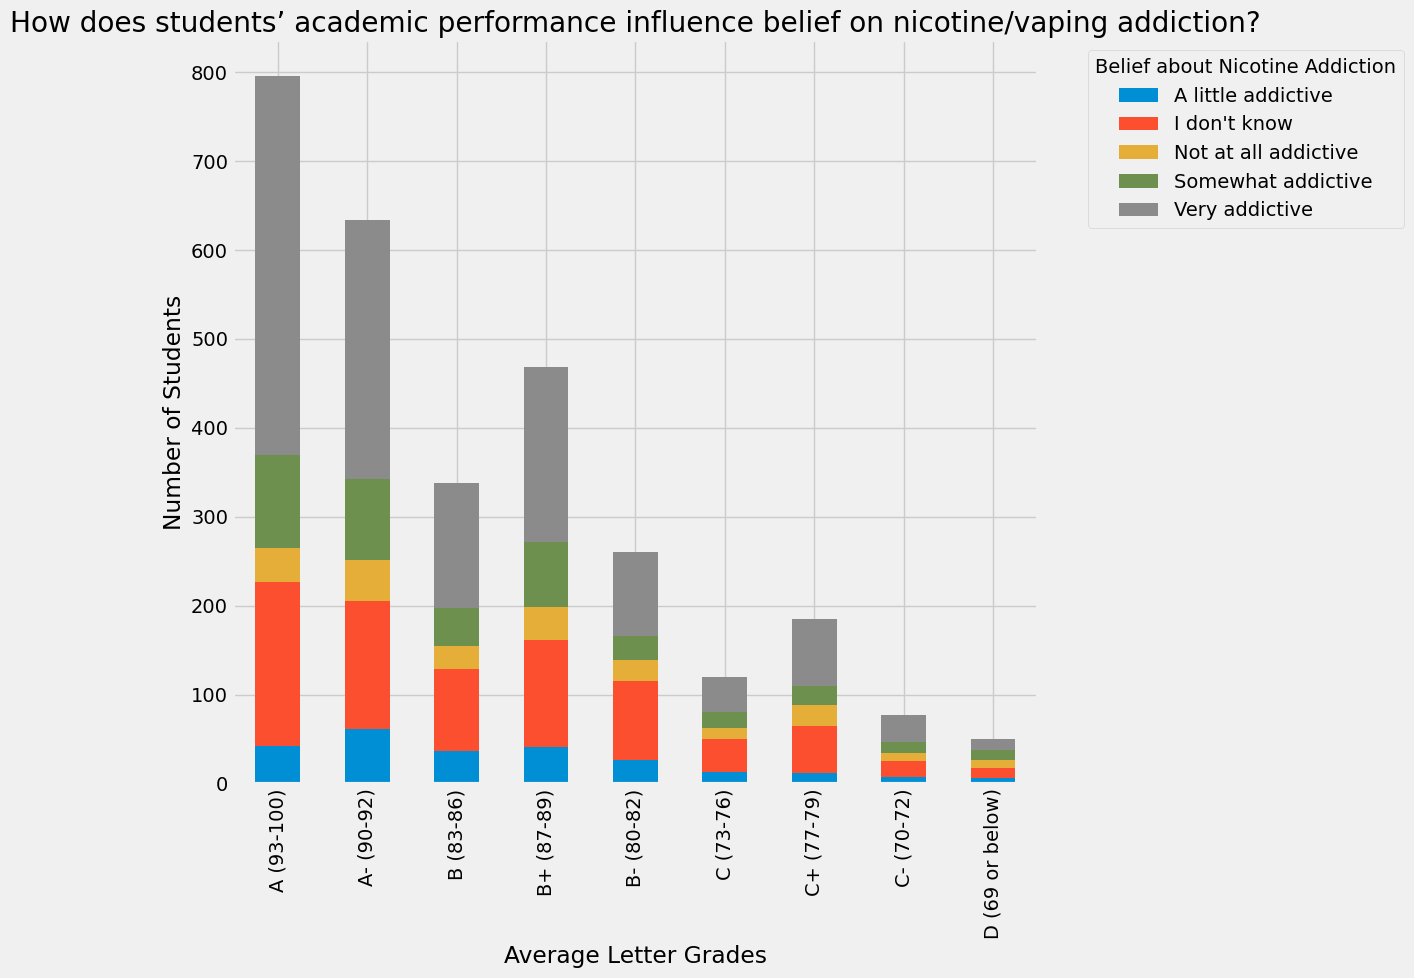

In [58]:
#How does students’ academic performance influence belief on nicotine/vaping addiction? 

Core_df['AverageGrade'] = Core_df['V2179'].map(grades_mapping)
Core_df['NicotineAddictionBelief'] = Core_df['V7931'].map(nicotine_addiction_mapping)

cross_tab = pd.crosstab(Core_df['AverageGrade'], Core_df['NicotineAddictionBelief'])
cross_tab.plot(kind='bar', stacked=True, figsize=(13, 10))

plt.title('How does students’ academic performance influence belief on nicotine/vaping addiction?')
plt.xlabel('Average Letter Grades')
plt.ylabel('Number of Students')
plt.legend(title='Belief about Nicotine Addiction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
#Do students’ political party beliefs correlate to marijuana usage? 
marijuana_use_mapping = {
    1: "0 Occasions",
    2: "1-2 Occasions",
    3: "3-5 Occasions",
    4: "6-9 Occasions",
    5: "10-19 Occasions",
    6: "20-39 Occasions",
    7: "40 or More Occasions"
}

Core_df['PoliticalBeliefs'] = Core_df['V2167'].map(political_beliefs_mapping)
Core_df['MarijuanaUse'] = Core_df['V2117'].map(marijuana_use_mapping)

def categorize_user_frequency(usage):
    """
    Categorizes the smoking frequency of a user based on marijuana usage in the last 30 days.
    """
    if usage == "40 or More Occasions":
        return "Excessive Smoker"
    elif usage in ["20-39 Occasions", "10-19 Occasions", "6-9 Occasions"]:
        return "Frequent Smoker"
    elif usage == "3-5 Occasions":
        return "Occasional Smoker"
    elif usage == "1-2 Occasions":
        return "Rare Smoker"
    elif usage == "0 Occasions":
        return "Not a Smoker"

Core_df['Type of Smoker'] = Core_df['MarijuanaUse'].apply(categorize_use_frequency)
frequency_table = pd.crosstab(Core_df['Political Beliefs'], Core_df['Type of Smoker'])

ordered_columns = ['Excessive Smoker', 'Frequent Smoker', 'Occasional Smoker', 'Rare Smoker', 'Not a Smoker']
frequency_table = frequency_table[ordered_columns]

frequency_table

Type of Smoker,Excessive Smoker,Frequent Smoker,Occasional Smoker,Rare Smoker,Not a Smoker
Political Beliefs,,,,,
Conservative,38,44,27,67,871
Liberal,39,96,48,91,956
Moderate,48,102,49,115,1143
"None of the above, or don't know",133,186,91,177,2963
Radical,14,23,11,17,129
Very Conservative,22,20,10,28,404
Very Liberal,35,63,27,46,432
